GPU Processing Time(ms): 570.5010890960693


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


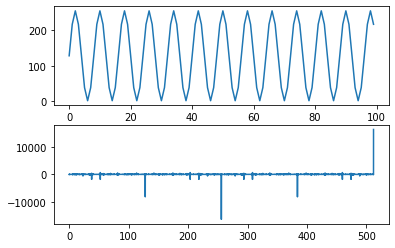

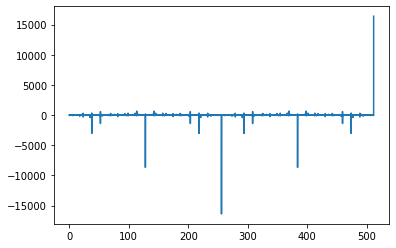

In [56]:
import cuda_pfb
import numpy as np
from matplotlib import pyplot as plt
import time
import imp
imp.reload(cuda_pfb)

taps = 4
spectra = 512
channels = 16384
samples = 2 * channels * (spectra + taps-1)

fs = 1024  # sample freq  = 1GSps
fin = 128  # input freq: 128MHz
t = np.arange(0,samples,1)
tmp = 127*np.sin(t * 2*np.pi*fin/fs) + 128
din = tmp.astype(np.uint8)
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(din[0:100])

t0 = time.time()
dout = cuda_pfb.cuda_pfb(din)
t1 = time.time()
print('GPU Processing Time(ms):',(t1-t0)*1000)

x = fs/(channels+1)/2 * np.arange(0,(channels+1),1)
plt.subplot(2,1,2)
plt.plot(x, dout[0:channels+1])
plt.figure(2)
plt.plot(x,dout[channels+1:2*(channels+1)])

In [45]:
print(dout.shape)

(8389120,)


In [39]:
len(dout[0:16385])

16385